In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
import sys
sys.path.append('..')

from stmt.regressor.stmt import StochasticThresholdModelTrees
from stmt.threshold_selector import NormalGaussianDistribution
from stmt.criterion import MSE

# Definition of the drawing function

In [3]:
def my_plot(X_train, Y_train, X_test=None, Yp_test=None, title=None, fontsize=None,
                       x_min=None, x_max=None, y_min=None, y_max=None, legend=False):
    fig = plt.figure()
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['mathtext.fontset'] = 'cm'
    plt.rcParams['axes.linewidth'] = 1.0

    # Draw training data
    plt.plot(X_train, Y_train, 'b.', markersize=15, label=u'Training Data')
    min_x = X_train.min()
    max_x = X_train.max()
    min_y = Y_train.min()
    max_y = Y_train.max()
    
    # Draw test data
    if (X_test is not None) and (Yp_test is not None):
        plt.plot(X_test,  Yp_test, 'r-', label=u'Prediction')
        min_y = min(min_y, Yp_test.min())
        max_y = max(max_y, Yp_test.max())
    
    # Drawing range settings
    if (x_min is not None) and (x_max is not None):
        plt.xlim(x_min, x_max)
    else:
        plt.xlim(min_x - 0.05 * (max_x - min_x), max_x + 0.05 * (max_x - min_x))
    if (y_min is not None) and (y_max is not None):
        plt.ylim(y_min, y_max)
    else:
        plt.ylim(min_y - 0.05 * (max_y - min_y), max_y + 0.05 * (max_y - min_y))
    plt.tick_params(labelsize=fontsize)
    
    if title is not None:
        plt.title(title, fontsize=fontsize)
    plt.xlabel(r"$x$", fontsize=25)
    plt.ylabel(r"$y$", fontsize=25)
    if legend:
        plt.legend(bbox_to_anchor=(0.0, 1.0), loc='upper left', fontsize=fontsize)
    
    # Output
    plt.tight_layout()
    plt.show()

# Linear data

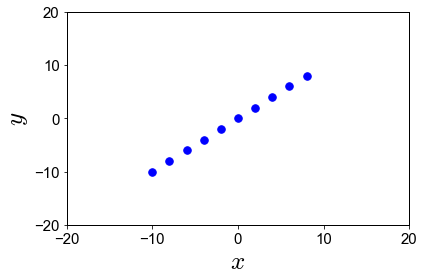

In [4]:
x_train_Linear = np.arange(-10, 9, 2).reshape(-1, 1)
y_train_Linear = np.arange(-10, 9, 2)

my_plot(x_train_Linear, y_train_Linear, fontsize=15, x_min=-20, x_max=20, y_min=-20, y_max=20)

In [5]:
x_test_Linear = np.arange(-20, 21, 0.1).reshape(-1, 1)

## Random Forest

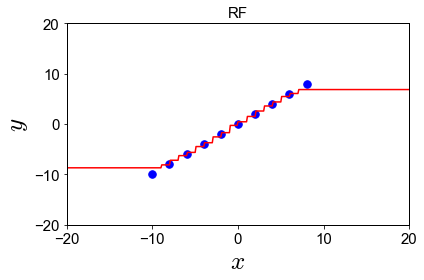

In [6]:
model_RF = RandomForestRegressor(n_estimators=100)
model_RF.fit(x_train_Linear, y_train_Linear)
y_pred_RF = model_RF.predict(x_test_Linear)

my_plot(x_train_Linear, y_train_Linear, x_test_Linear, y_pred_RF, fontsize=15,
                x_min=-20, x_max=20, y_min=-20, y_max=20, title="RF")

## Proposed method

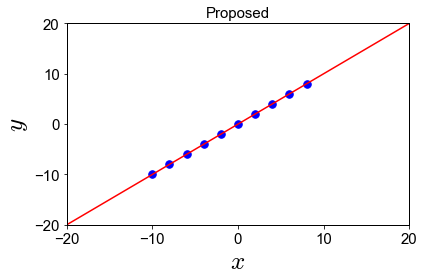

In [7]:
model_Proposed = StochasticThresholdModelTrees(
    n_estimators=100,
    criterion=MSE(),
    regressor=LinearRegression(),
    threshold_selector=NormalGaussianDistribution(5),
    min_samples_leaf=2,
    f_select=False)
model_Proposed.fit(x_train_Linear, y_train_Linear)
y_pred_Proposed = model_Proposed.predict(x_test_Linear)

my_plot(x_train_Linear, y_train_Linear, x_test_Linear, y_pred_Proposed, fontsize=15,
                x_min=-20, x_max=20, y_min=-20, y_max=20, title="Proposed")

# Mixed sparse and dense data

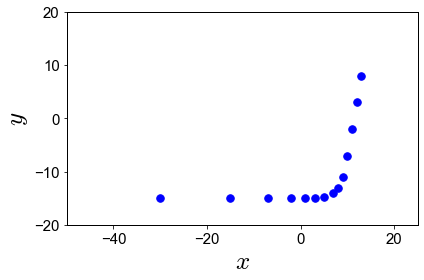

In [8]:
x_train_Mixed_sparse_dense = np.array([-30, -15, -7, -2, 1, 3, 5, 7, 8, 9, 10, 11, 12, 13]).reshape(-1, 1)
y_train_Mixed_sparse_dense = np.array([-15, -15, -15, -15, -15, -15, -14.8, -14, -13, -11, -7, -2, 3, 8])

my_plot(x_train_Mixed_sparse_dense, y_train_Mixed_sparse_dense, fontsize=15, x_min=-50, x_max=25, y_min=-20, y_max=20)

In [9]:
x_test_Mixed_sparse_dense = np.arange(-50, 25, 0.1).reshape(-1, 1)

## Random Forest

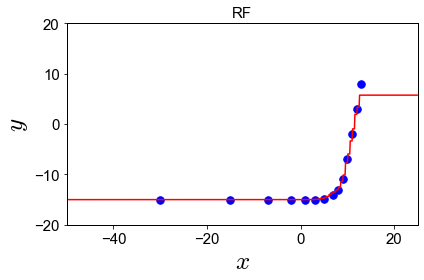

In [10]:
model_RF = RandomForestRegressor(n_estimators=100)
model_RF.fit(x_train_Mixed_sparse_dense, y_train_Mixed_sparse_dense)
y_pred_RF = model_RF.predict(x_test_Mixed_sparse_dense)

my_plot(x_train_Mixed_sparse_dense, y_train_Mixed_sparse_dense, x_test_Mixed_sparse_dense, y_pred_RF, fontsize=15,
                x_min=-50, x_max=25, y_min=-20, y_max=20, title="RF")

## Proposed method

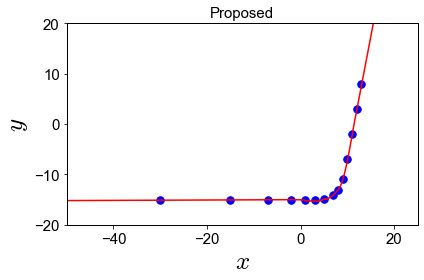

In [11]:
model_Proposed = StochasticThresholdModelTrees(
    n_estimators=100,
    criterion=MSE(),
    regressor=LinearRegression(),
    threshold_selector=NormalGaussianDistribution(5),
    min_samples_leaf=2,
    f_select=False)
model_Proposed.fit(x_train_Mixed_sparse_dense, y_train_Mixed_sparse_dense)
y_pred_Proposed = model_Proposed.predict(x_test_Mixed_sparse_dense)

my_plot(x_train_Mixed_sparse_dense, y_train_Mixed_sparse_dense, x_test_Mixed_sparse_dense, y_pred_Proposed, fontsize=15,
                x_min=-50, x_max=25, y_min=-20, y_max=20, title="Proposed")

# Quadratic data

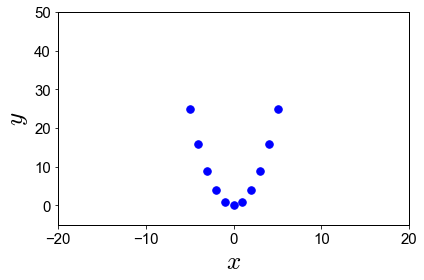

In [12]:
x_train_Quadratic = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y_train_Quadratic = (x_train_Quadratic * x_train_Quadratic).ravel()

my_plot(x_train_Quadratic, y_train_Quadratic, fontsize=15, x_min=-20, x_max=20, y_min=-5, y_max=50)

In [13]:
x_test_Quadratic = np.arange(-20, 20, 0.1).reshape(-1, 1)

## Random Forest

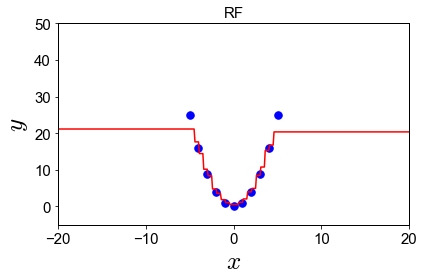

In [14]:
model_RF = RandomForestRegressor(n_estimators=100)
model_RF.fit(x_train_Quadratic, y_train_Quadratic)
y_pred_RF = model_RF.predict(x_test_Quadratic)

my_plot(x_train_Quadratic, y_train_Quadratic, x_test_Quadratic, y_pred_RF, fontsize=15,
                x_min=-20, x_max=20, y_min=-5, y_max=50, title="RF")

## Proposed method

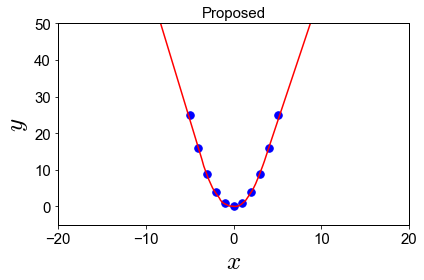

In [15]:
model_Proposed = StochasticThresholdModelTrees(
    n_estimators=100,
    criterion=MSE(),
    regressor=LinearRegression(),
    threshold_selector=NormalGaussianDistribution(5),
    min_samples_leaf=2,
    f_select=False)
model_Proposed.fit(x_train_Quadratic, y_train_Quadratic)
y_pred_Proposed = model_Proposed.predict(x_test_Quadratic)

my_plot(x_train_Quadratic, y_train_Quadratic, x_test_Quadratic, y_pred_Proposed, fontsize=15,
                x_min=-20, x_max=20, y_min=-5, y_max=50, title="Proposed")

# discontinuous data

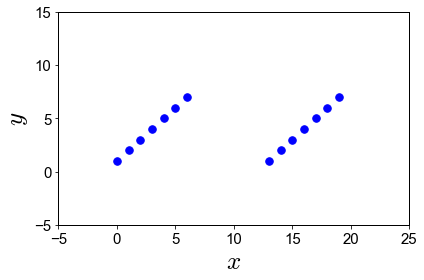

In [16]:
x_train_1 = np.arange(0, 7, 1).reshape(-1, 1)
x_train_2 = np.arange(13, 20, 1).reshape(-1, 1)
x_train_Discontinuous = np.vstack((x_train_1, x_train_2)).reshape(-1, 1)
y_train_1 = np.arange(1, 8, 1).reshape(-1, 1)
y_train_2 = np.arange(1, 8, 1).reshape(-1, 1)
y_train_Discontinuous = np.vstack((y_train_1, y_train_2)).ravel()

my_plot(x_train_Discontinuous, y_train_Discontinuous, fontsize=15, x_min=-5, x_max=25, y_min=-5, y_max=15)

In [17]:
x_test_Discontinuous = np.arange(-5, 25, 0.1).reshape(-1, 1)

## Ramdom Forest

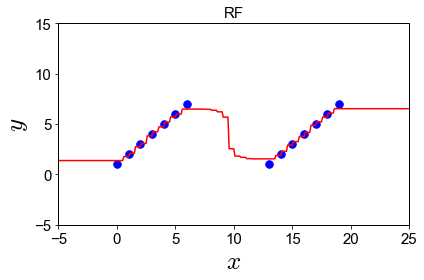

In [18]:
model_RF = RandomForestRegressor(n_estimators=100)
model_RF.fit(x_train_Discontinuous, y_train_Discontinuous)
y_pred_RF = model_RF.predict(x_test_Discontinuous)

my_plot(x_train_Discontinuous, y_train_Discontinuous, x_test_Discontinuous, y_pred_RF, fontsize=15,
                x_min=-5, x_max=25, y_min=-5, y_max=15, title="RF")

## Proposed method

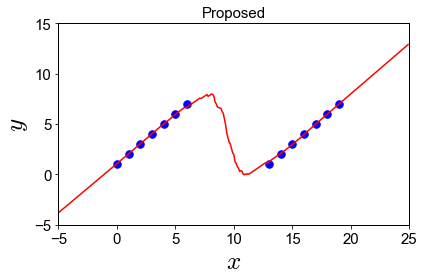

In [19]:
model_Proposed = StochasticThresholdModelTrees(
    n_estimators=100,
    criterion=MSE(),
    regressor=LinearRegression(),
    threshold_selector=NormalGaussianDistribution(5),
    min_samples_leaf=2,
    f_select=False)
model_Proposed.fit(x_train_Discontinuous, y_train_Discontinuous)
y_pred_Proposed = model_Proposed.predict(x_test_Discontinuous)

my_plot(x_train_Discontinuous, y_train_Discontinuous, x_test_Discontinuous, y_pred_Proposed, fontsize=15,
                x_min=-5, x_max=25, y_min=-5, y_max=15, title="Proposed")

# Comparison

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [21]:
sys.path.append('..')
from stmt.threshold_selector import MidPoint

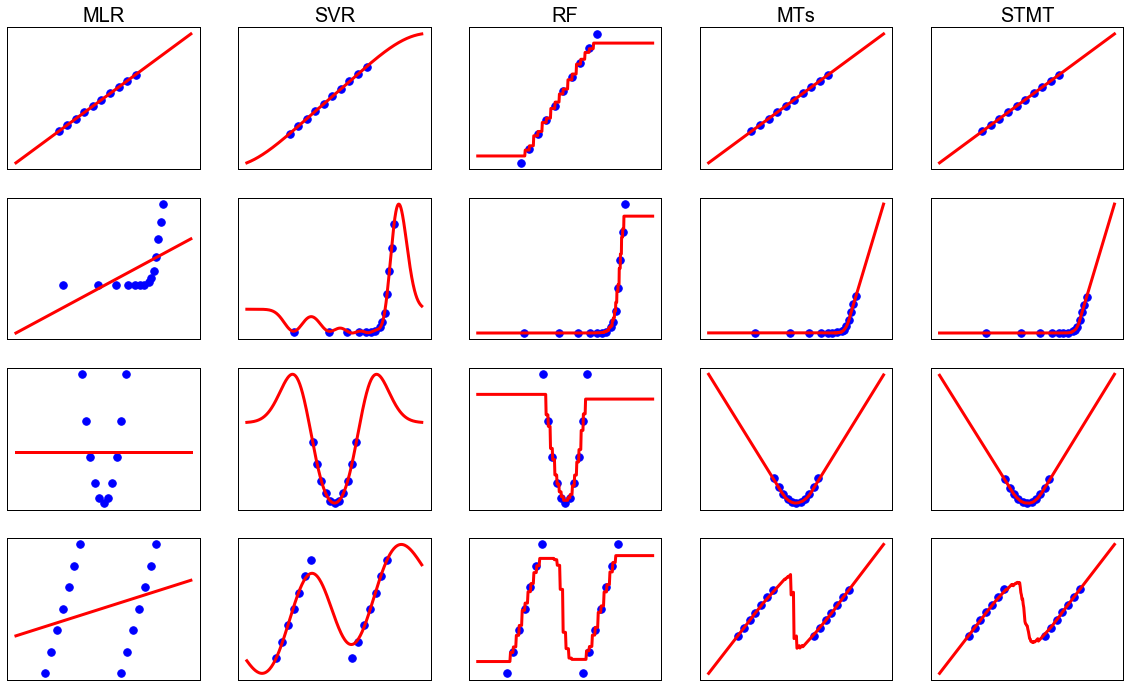

In [25]:
data = ['Linear', 'Mixed_sparse_dense', 'Quadratic', 'Discontinuous']
model_names = ['MLR', 'SVR', 'RF', 'MTs', 'STMT']

models = [
    LinearRegression(),
    GridSearchCV(
        SVR(),
        param_grid={
            'gamma': [2**ii for ii in range(-10, 0)],
            'epsilon': [2**ii for ii in range(-10, 0)],
            'C': [2**ii for ii in range(0, 10)]
        },
        cv=5,
        iid=False
    ),
    RandomForestRegressor(n_estimators=100),
    StochasticThresholdModelTrees(
        n_estimators=100,
        criterion=MSE(),
        regressor=LinearRegression(),
        threshold_selector=MidPoint(),
        min_samples_leaf=2,
        f_select=False),
    StochasticThresholdModelTrees(
        n_estimators=100,
        criterion=MSE(),
        regressor=LinearRegression(),
        threshold_selector=NormalGaussianDistribution(5),
        min_samples_leaf=2,
        f_select=False)
]

rows = len(data)
cols = len(models)
fig = plt.figure(figsize=[20, 12])
for row, datam in enumerate(data):
    for col, model in enumerate(models):
        exec(f'x_train = x_train_{datam}')
        exec(f'y_train = y_train_{datam}')
        exec(f'x_test = x_test_{datam}')
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        ax = fig.add_subplot(rows, cols, 1 + col + row*cols)
        
        plt.plot(x_train, y_train, 'b.', markersize=15)
        plt.plot(x_test,  y_pred, 'r-', lw=3.)
        plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False,
                bottom=False,
                left=False,
                right=False,
                top=False)
        if row == 0:
            plt.title(model_names[col], fontsize=20)
plt.savefig('1dim_comparison.png', dpi=150)